In [1]:
import pandas as pd
import pandas_profiling as pp  #to get overview about data
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno # missingno package is helpful for visualizing the missingness.
%matplotlib inline

Data Description

Some statistic about data

In [2]:
df=pd.read_csv('/content/04_secondExam_data_english_G_v1.3.csv')

In [3]:
df.head()

desk_no                           name  \
0  102353.0  اسماعيل احمد خلف محمد الحسيني   
1  102361.0       حسن خالد عبدالفتاح جوهري   
2  102367.0       سامي احمد سامي محمد بدوي   
3  102390.0          تايا نادر رؤوف الهامي   
4  102405.0           فريده ناير علوي فؤاد   

                     schoolName_Arabic schoolName_English  \
0  الالمانية الانجيلية خ بنين (ابيتور)             sch733   
1  الالمانية الانجيلية خ بنين (ابيتور)             sch733   
2  الالمانية الانجيلية خ بنين (ابيتور)             sch733   
3  الالمانية الانجيلية خ بنات (ابيتور)             sch734   
4  الالمانية الانجيلية خ بنات (ابيتور)             sch734   

  administration_Arabic administration_English government_Arabic  \
0                 الدقى                admin68            الجيزة   
1                 الدقى                admin68            الجيزة   
2                 الدقى                admin68            الجيزة   
3                 الدقى                admin68            الجيزة   
4                 الدقى                admin68            الجيزة   

  government_English     branch Percentage  ...    chemistry      biology  \
0               Giza  undefined      9.76%  ...  unscheduled  unscheduled   
1               Giza  undefined      9.76%  ...  unscheduled  unscheduled   
2               Giza  undefined      0.00%  ...  unscheduled  unscheduled   
3               Giza  undefined      9.76%  ...  unscheduled  unscheduled   
4               Giza  undefined      9.76%  ...  unscheduled  unscheduled   

       geology applied_math      physics total religion altarbiat_alwatania  \
0  unscheduled  unscheduled  unscheduled  40.0       16                  16   
1  unscheduled  unscheduled  unscheduled  40.0       21                  18   
2  unscheduled  unscheduled  unscheduled   0.0       20                  18   
3  unscheduled  unscheduled  unscheduled  40.0       13                  19   
4  unscheduled  unscheduled  unscheduled  40.0       13                  13   

  economics_statistics gender  
0          unscheduled      M  
1          unscheduled      M  
2          unscheduled      M  
3          unscheduled      F  
4          unscheduled      F  

[5 rows x 30 columns]

In [ ]:
df.shape

(62134, 30)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62134 entries, 0 to 62133
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   desk_no                 62134 non-null  int64  
 1   name                    62134 non-null  object 
 2   schoolName_Arabic       62134 non-null  object 
 3   schoolName_English      62134 non-null  object 
 4   administration_Arabic   62134 non-null  object 
 5   administration_English  62134 non-null  object 
 6   government_Arabic       62134 non-null  object 
 7   government_English      62134 non-null  object 
 8   branch                  62134 non-null  object 
 9   Percentage              62134 non-null  object 
 10  student_type            62134 non-null  object 
 11  status                  62134 non-null  object 
 12  arabic                  62134 non-null  object 
 13  first_foreign_lang      62134 non-null  object 
 14  second_foreign_lang     62134 non-null

In [ ]:
df.describe(include='all')

desk_no                 name           schoolName_Arabic  \
count    62134.000000                62134                       62134   
unique            NaN                61775                        2008   
top               NaN  محمد احمد محمد احمد  السعيدية الثانوية العسكرية   
freq              NaN                   11                         653   
mean    242263.973847                  NaN                         NaN   
std      82481.284233                  NaN                         NaN   
min     102353.000000                  NaN                         NaN   
25%     171246.500000                  NaN                         NaN   
50%     244586.500000                  NaN                         NaN   
75%     314125.750000                  NaN                         NaN   
max     387087.000000                  NaN                         NaN   

       schoolName_English administration_Arabic administration_English  \
count               62134                 62134                  62134   
unique               2008                   104                    104   
top               sch1860             العمرانية                admin77   
freq                  653                  3049                   3049   
mean                  NaN                   NaN                    NaN   
std                   NaN                   NaN                    NaN   
min                   NaN                   NaN                    NaN   
25%                   NaN                   NaN                    NaN   
50%                   NaN                   NaN                    NaN   
75%                   NaN                   NaN                    NaN   
max                   NaN                   NaN                    NaN   

       government_Arabic government_English    branch Percentage  ...  \
count              62134              62134     62134      62134  ...   
unique                11                 11         4        359  ...   
top               الجيزة               Giza  literary     50.00%  ...   
freq               24318              24318     29725       1993  ...   
mean                 NaN                NaN       NaN        NaN  ...   
std                  NaN                NaN       NaN        NaN  ...   
min                  NaN                NaN       NaN        NaN  ...   
25%                  NaN                NaN       NaN        NaN  ...   
50%                  NaN                NaN       NaN        NaN  ...   
75%                  NaN                NaN       NaN        NaN  ...   
max                  NaN                NaN       NaN        NaN  ...   

          chemistry      biology      geology applied_math      physics  \
count         62134        62134        62134        62133        62133   
unique           68           67           76           51           55   
top     unscheduled  unscheduled  unscheduled  unscheduled  unscheduled   
freq          31047        39668        39669        53512        31046   
mean            NaN          NaN          NaN          NaN          NaN   
std             NaN          NaN          NaN          NaN          NaN   
min             NaN          NaN          NaN          NaN          NaN   
25%             NaN          NaN          NaN          NaN          NaN   
50%             NaN          NaN          NaN          NaN          NaN   
75%             NaN          NaN          NaN          NaN          NaN   
max             NaN          NaN          NaN          NaN          NaN   

               total religion altarbiat_alwatania economics_statistics gender  
count   62133.000000    62133               62133                62133  62133  
unique           NaN       28                  30                   49     56  
top              NaN  passing             passing                   25      M  
freq             NaN    15159               15141                25293  53586  
mean      221.637978      NaN                 NaN         

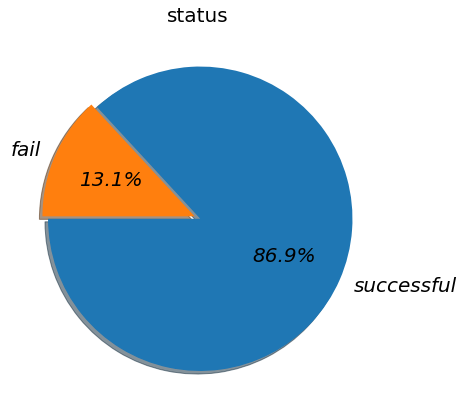

In [ ]:
pie=df[["status"]].value_counts()
plt.figure(figsize=(7,7))

plt.pie(pie, labels=["successful", "fail"],
        explode=[0.02,0.02],
        startangle=180,
        autopct='%1.1f%%',shadow=True, 
        textprops={"fontsize":20, "style":"italic"})

plt.title('status', fontsize=20)
plt.show()

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     \ 22.0 MB 146 kB/s
     |████████████████████████████████| 102 kB 7.9 MB/s 
     |████████████████████████████████| 696 kB 61.3 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 9.9 MB 38.4 MB/s 
     |████████████████████████████████| 4.7 MB 51.1 MB/s 
     |████████████████████████████████| 296 kB 66.0 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-dev-py2.py3-none-any.whl size=324949 sha256=3d8978cf87dbe547b99b65431f6fb4dc32eea1bf41a54ca51ce806871c755c89
  Stored in directory: /tmp/pip-ephem-wheel-cache-xzqi9rky/wheels/64/b6/85/dfc808b23666a5910371784e349d28818006ff63ed9cfeca59
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=f1fea2cd73fa0b9ffc42cffb84cc4e1a88c1c98bad6897109d8438d7cc09d813
  Stored in directory: /root/.cache/pip/wheels/23/14/6e/4be5bfeeb027f4939a01764b

In [ ]:
#take_overview about data

import pandas_profiling as pp
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Cleaning Data

In [ ]:
df.isnull().sum()

desk_no                   0
name                      0
schoolName_Arabic         0
schoolName_English        0
administration_Arabic     0
administration_English    0
government_Arabic         0
government_English        0
branch                    0
Percentage                0
student_type              0
status                    0
arabic                    0
first_foreign_lang        0
second_foreign_lang       0
pure_mathematics          0
history                   0
geography                 0
philosophy                0
psychology                0
chemistry                 0
biology                   0
geology                   0
applied_math              1
physics                   1
total                     1
religion                  1
altarbiat_alwatania       1
economics_statistics      1
gender                    1
dtype: int64

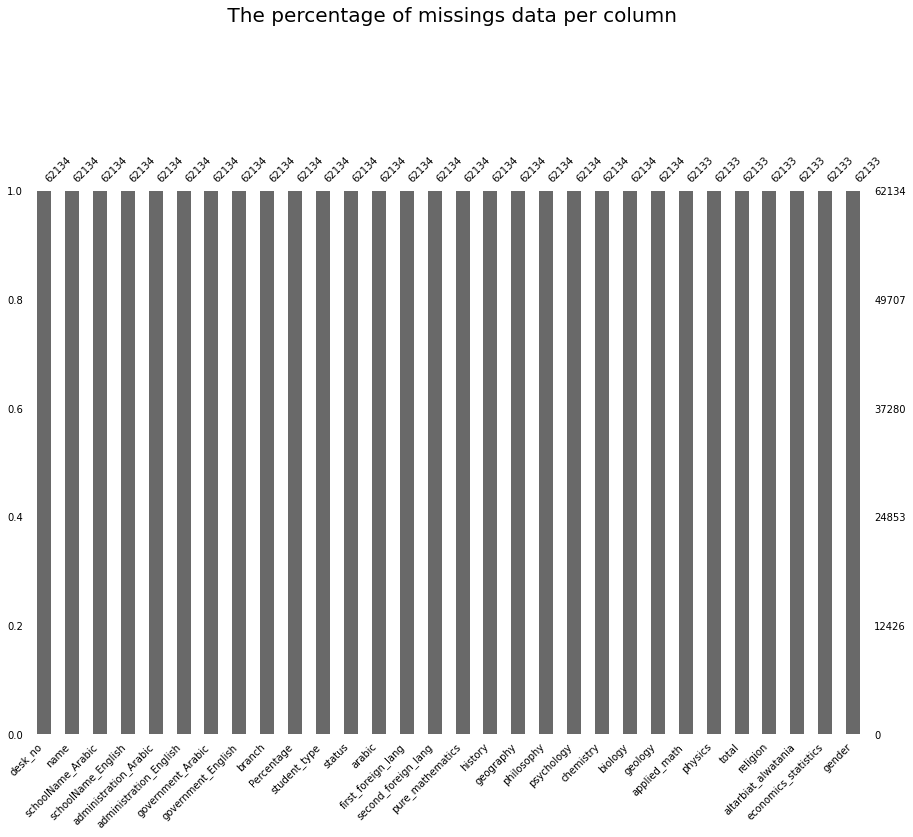

In [ ]:
msno.bar(df, figsize=(15,10), fontsize=10)
plt.title(" The percentage of missings data per column", y=1.3, fontsize=20)
plt.show()

Flling Missing Values

In [4]:


#catgorical
df["gender "] = df["gender"].fillna(' ')






In [ ]:
df.duplicated()  

0        False
1        False
2        False
3        False
4        False
         ...  
62129    False
62130    False
62131    False
62132    False
62133    False
Length: 62134, dtype: bool

Now we need to drop some repetited columns that don't help me.

In [5]:
data=df.copy()
data.head()

desk_no                           name  \
0  102353.0  اسماعيل احمد خلف محمد الحسيني   
1  102361.0       حسن خالد عبدالفتاح جوهري   
2  102367.0       سامي احمد سامي محمد بدوي   
3  102390.0          تايا نادر رؤوف الهامي   
4  102405.0           فريده ناير علوي فؤاد   

                     schoolName_Arabic schoolName_English  \
0  الالمانية الانجيلية خ بنين (ابيتور)             sch733   
1  الالمانية الانجيلية خ بنين (ابيتور)             sch733   
2  الالمانية الانجيلية خ بنين (ابيتور)             sch733   
3  الالمانية الانجيلية خ بنات (ابيتور)             sch734   
4  الالمانية الانجيلية خ بنات (ابيتور)             sch734   

  administration_Arabic administration_English government_Arabic  \
0                 الدقى                admin68            الجيزة   
1                 الدقى                admin68            الجيزة   
2                 الدقى                admin68            الجيزة   
3                 الدقى                admin68            الجيزة   
4                 الدقى                admin68            الجيزة   

  government_English     branch Percentage  ...      biology      geology  \
0               Giza  undefined      9.76%  ...  unscheduled  unscheduled   
1               Giza  undefined      9.76%  ...  unscheduled  unscheduled   
2               Giza  undefined      0.00%  ...  unscheduled  unscheduled   
3               Giza  undefined      9.76%  ...  unscheduled  unscheduled   
4               Giza  undefined      9.76%  ...  unscheduled  unscheduled   

  applied_math      physics total religion altarbiat_alwatania  \
0  unscheduled  unscheduled  40.0       16                  16   
1  unscheduled  unscheduled  40.0       21                  18   
2  unscheduled  unscheduled   0.0       20                  18   
3  unscheduled  unscheduled  40.0       13                  19   
4  unscheduled  unscheduled  40.0       13                  13   

  economics_statistics gender gender   
0          unscheduled      M       M  
1          unscheduled      M       M  
2          unscheduled      M       M  
3          unscheduled      F       F  
4          unscheduled      F       F  

[5 rows x 31 columns]

In [6]:
data.drop(['schoolName_English','administration_English','government_English','religion','altarbiat_alwatania','economics_statistics'],axis=1,inplace=True)

In [7]:
data.head()

desk_no                           name  \
0  102353.0  اسماعيل احمد خلف محمد الحسيني   
1  102361.0       حسن خالد عبدالفتاح جوهري   
2  102367.0       سامي احمد سامي محمد بدوي   
3  102390.0          تايا نادر رؤوف الهامي   
4  102405.0           فريده ناير علوي فؤاد   

                     schoolName_Arabic administration_Arabic  \
0  الالمانية الانجيلية خ بنين (ابيتور)                 الدقى   
1  الالمانية الانجيلية خ بنين (ابيتور)                 الدقى   
2  الالمانية الانجيلية خ بنين (ابيتور)                 الدقى   
3  الالمانية الانجيلية خ بنات (ابيتور)                 الدقى   
4  الالمانية الانجيلية خ بنات (ابيتور)                 الدقى   

  government_Arabic     branch Percentage     student_type      status  \
0            الجيزة  undefined      9.76%  Other qualities  successful   
1            الجيزة  undefined      9.76%  Other qualities  successful   
2            الجيزة  undefined      0.00%  Other qualities        fail   
3            الجيزة  undefined      9.76%  Other qualities  successful   
4            الجيزة  undefined      9.76%  Other qualities  successful   

   arabic  ...   philosophy   psychology    chemistry      biology  \
0      40  ...  unscheduled  unscheduled  unscheduled  unscheduled   
1      40  ...  unscheduled  unscheduled  unscheduled  unscheduled   
2  absent  ...  unscheduled  unscheduled  unscheduled  unscheduled   
3      40  ...  unscheduled  unscheduled  unscheduled  unscheduled   
4      40  ...  unscheduled  unscheduled  unscheduled  unscheduled   

       geology applied_math      physics total gender gender   
0  unscheduled  unscheduled  unscheduled  40.0      M       M  
1  unscheduled  unscheduled  unscheduled  40.0      M       M  
2  unscheduled  unscheduled  unscheduled   0.0      M       M  
3  unscheduled  unscheduled  unscheduled  40.0      F       F  
4  unscheduled  unscheduled  unscheduled  40.0      F       F  

[5 rows x 25 columns]

Now we will divde dataset into three datasets according to their branch

In [ ]:
print(data[["branch"]].value_counts())


branch     
literary       72909
science        63769
mathematics    17171
undefined       1680
dtype: int64


In [8]:
print (data['Percentage'].str[:-1].astype(float))  #didn't give me actually result on data

0          9.76
1          9.76
2          0.00
3          9.76
4          9.76
          ...  
155525    58.41
155526    60.85
155527    58.05
155528    65.85
155529      NaN
Name: Percentage, Length: 155530, dtype: float64


In [9]:
data['Percentage'] = (data['Percentage'].str.strip('%').astype(float))
print (data.head())


    desk_no                           name  \
0  102353.0  اسماعيل احمد خلف محمد الحسيني   
1  102361.0       حسن خالد عبدالفتاح جوهري   
2  102367.0       سامي احمد سامي محمد بدوي   
3  102390.0          تايا نادر رؤوف الهامي   
4  102405.0           فريده ناير علوي فؤاد   

                     schoolName_Arabic administration_Arabic  \
0  الالمانية الانجيلية خ بنين (ابيتور)                 الدقى   
1  الالمانية الانجيلية خ بنين (ابيتور)                 الدقى   
2  الالمانية الانجيلية خ بنين (ابيتور)                 الدقى   
3  الالمانية الانجيلية خ بنات (ابيتور)                 الدقى   
4  الالمانية الانجيلية خ بنات (ابيتور)                 الدقى   

  government_Arabic     branch  Percentage     student_type      status  \
0            الجيزة  undefined        9.76  Other qualities  successful   
1            الجيزة  undefined        9.76  Other qualities  successful   
2            الجيزة  undefined        0.00  Other qualities        fail   
3            الجيزة  undefined        

In [10]:
literary =data[['desk_no','name','schoolName_Arabic','administration_Arabic','government_Arabic','Percentage','student_type','status','arabic','first_foreign_lang','second_foreign_lang',
           'history','geography','philosophy','psychology','total','gender']]
science =data[['desk_no','name','schoolName_Arabic','administration_Arabic','government_Arabic','Percentage','student_type','status','arabic','first_foreign_lang','second_foreign_lang',
          'chemistry','biology','geology','physics','total','gender']]

mathematics =data[['desk_no','name','schoolName_Arabic','administration_Arabic','government_Arabic','Percentage','student_type','status','arabic','first_foreign_lang','second_foreign_lang',
              'physics','chemistry','applied_math','pure_mathematics','total','gender']]


Let's visualize Literary Result and discover which (school-government-administration) with good result.

In [11]:
literary.head()

desk_no                           name  \
0  102353.0  اسماعيل احمد خلف محمد الحسيني   
1  102361.0       حسن خالد عبدالفتاح جوهري   
2  102367.0       سامي احمد سامي محمد بدوي   
3  102390.0          تايا نادر رؤوف الهامي   
4  102405.0           فريده ناير علوي فؤاد   

                     schoolName_Arabic administration_Arabic  \
0  الالمانية الانجيلية خ بنين (ابيتور)                 الدقى   
1  الالمانية الانجيلية خ بنين (ابيتور)                 الدقى   
2  الالمانية الانجيلية خ بنين (ابيتور)                 الدقى   
3  الالمانية الانجيلية خ بنات (ابيتور)                 الدقى   
4  الالمانية الانجيلية خ بنات (ابيتور)                 الدقى   

  government_Arabic  Percentage     student_type      status  arabic  \
0            الجيزة        9.76  Other qualities  successful      40   
1            الجيزة        9.76  Other qualities  successful      40   
2            الجيزة        0.00  Other qualities        fail  absent   
3            الجيزة        9.76  Other qualities  successful      40   
4            الجيزة        9.76  Other qualities  successful      40   

  first_foreign_lang second_foreign_lang      history    geography  \
0        unscheduled         unscheduled  unscheduled  unscheduled   
1        unscheduled         unscheduled  unscheduled  unscheduled   
2        unscheduled         unscheduled  unscheduled  unscheduled   
3        unscheduled         unscheduled  unscheduled  unscheduled   
4        unscheduled         unscheduled  unscheduled  unscheduled   

    philosophy   psychology  total gender  
0  unscheduled  unscheduled   40.0      M  
1  unscheduled  unscheduled   40.0      M  
2  unscheduled  unscheduled    0.0      M  
3  unscheduled  unscheduled   40.0      F  
4  unscheduled  unscheduled   40.0      F

In [ ]:
literary.shape

(155530, 17)

In [ ]:
literary.isnull().sum()

desk_no                  1
name                     1
schoolName_Arabic        1
administration_Arabic    1
government_Arabic        1
Percentage               1
student_type             1
status                   1
arabic                   1
first_foreign_lang       1
second_foreign_lang      1
history                  1
geography                1
philosophy               1
psychology               1
total                    1
gender                   0
dtype: int64

In [ ]:
literary.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
155525    False
155526    False
155527    False
155528    False
155529    False
Length: 155530, dtype: bool

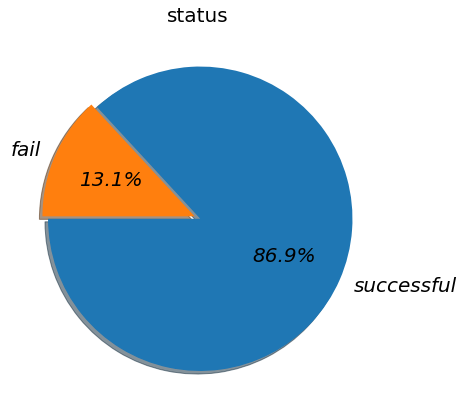

In [ ]:
pie=literary[["status"]].value_counts()
plt.figure(figsize=(7,7))

plt.pie(pie, labels=["successful", "fail"],
        explode=[0.02,0.02],
        startangle=180,
        autopct='%1.1f%%',shadow=True, 
        textprops={"fontsize":20, "style":"italic"})

plt.title('status', fontsize=20)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


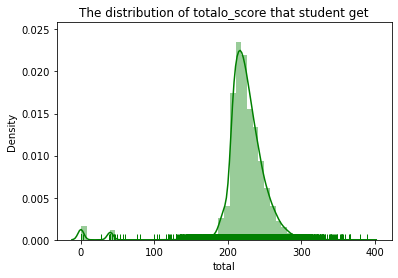

In [ ]:
ax= sns.distplot(literary['total'], rug=True, color="green")
plt.title("The distribution of totalo_score that student get")
plt.show()

According this distributions the data has overfitting

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


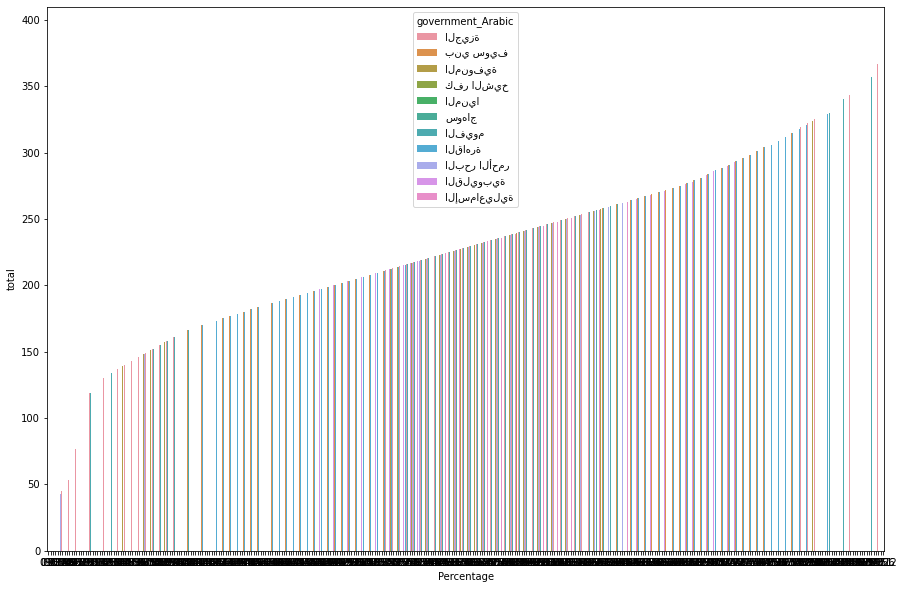

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot('Percentage','total','government_Arabic', literary) 

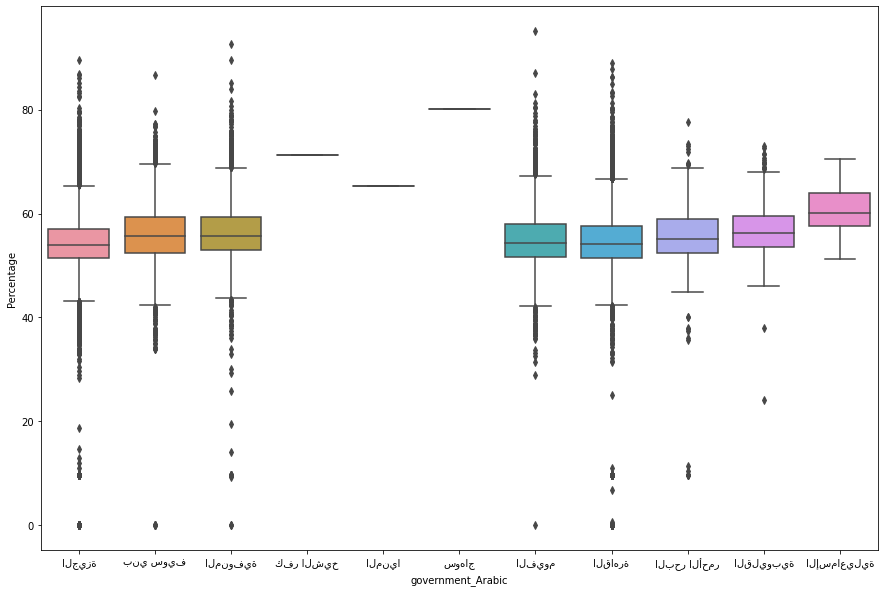

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x='government_Arabic',y='Percentage',data=literary)


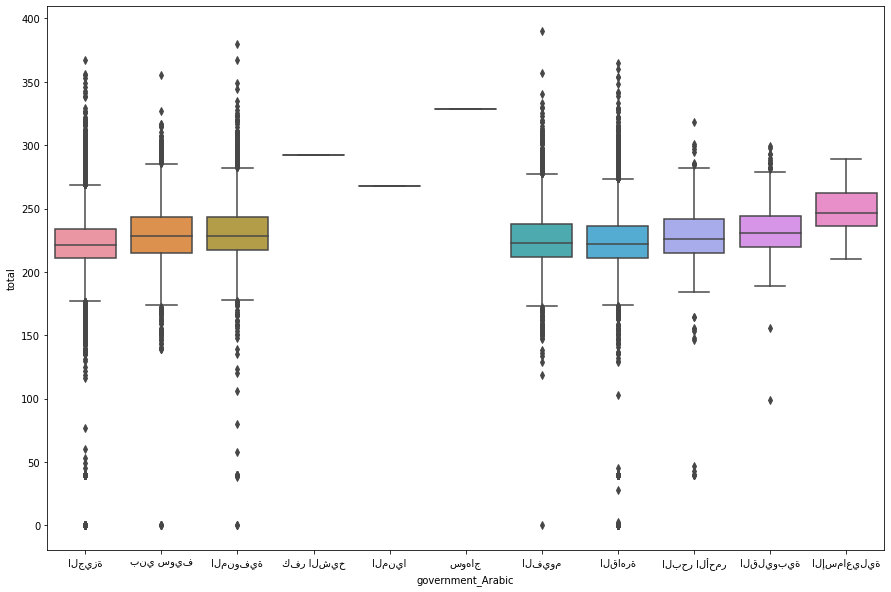

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x='government_Arabic',y='total',data=literary)

In [ ]:
#2
plt.figure(figsize=(25,15))
sns.barplot('Percentage','total','schoolName_Arabic', literary) 

In [ ]:
literary[["schoolName_Arabic"]].value_counts()

schoolName_Arabic                                                 
السعيدية الثانوية العسكرية                                            653
جمال عبد الناصر ث بنات                                                570
الشهيد الرائد احمد خالد صلاح ابراهيم الحجار                           464
الوراق الثانوية بنات                                                  431
منازل إدارة قويسنا                                                    348
                                                                     ... 
منازل ادارة الباويطى بنات                                               1
منازل ادارة الباويطى بنين                                               1
الرائد احمد محمد عبده الرسمية المتميزه لغات بنات (على مبارك سابقا)      1
البريق لغات ث بنين (فرنسي)                                              1
مدينة السادات الخاصة للغات                                              1
Length: 2470, dtype: int64

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x='schoolName_Arabic'.value_counts().reset_index()[:4],data=literary)

In [ ]:
#plt.figure(figsize=(15,10))
#sns.boxplot(x='schoolName_Arabic',y='total',data=literary)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


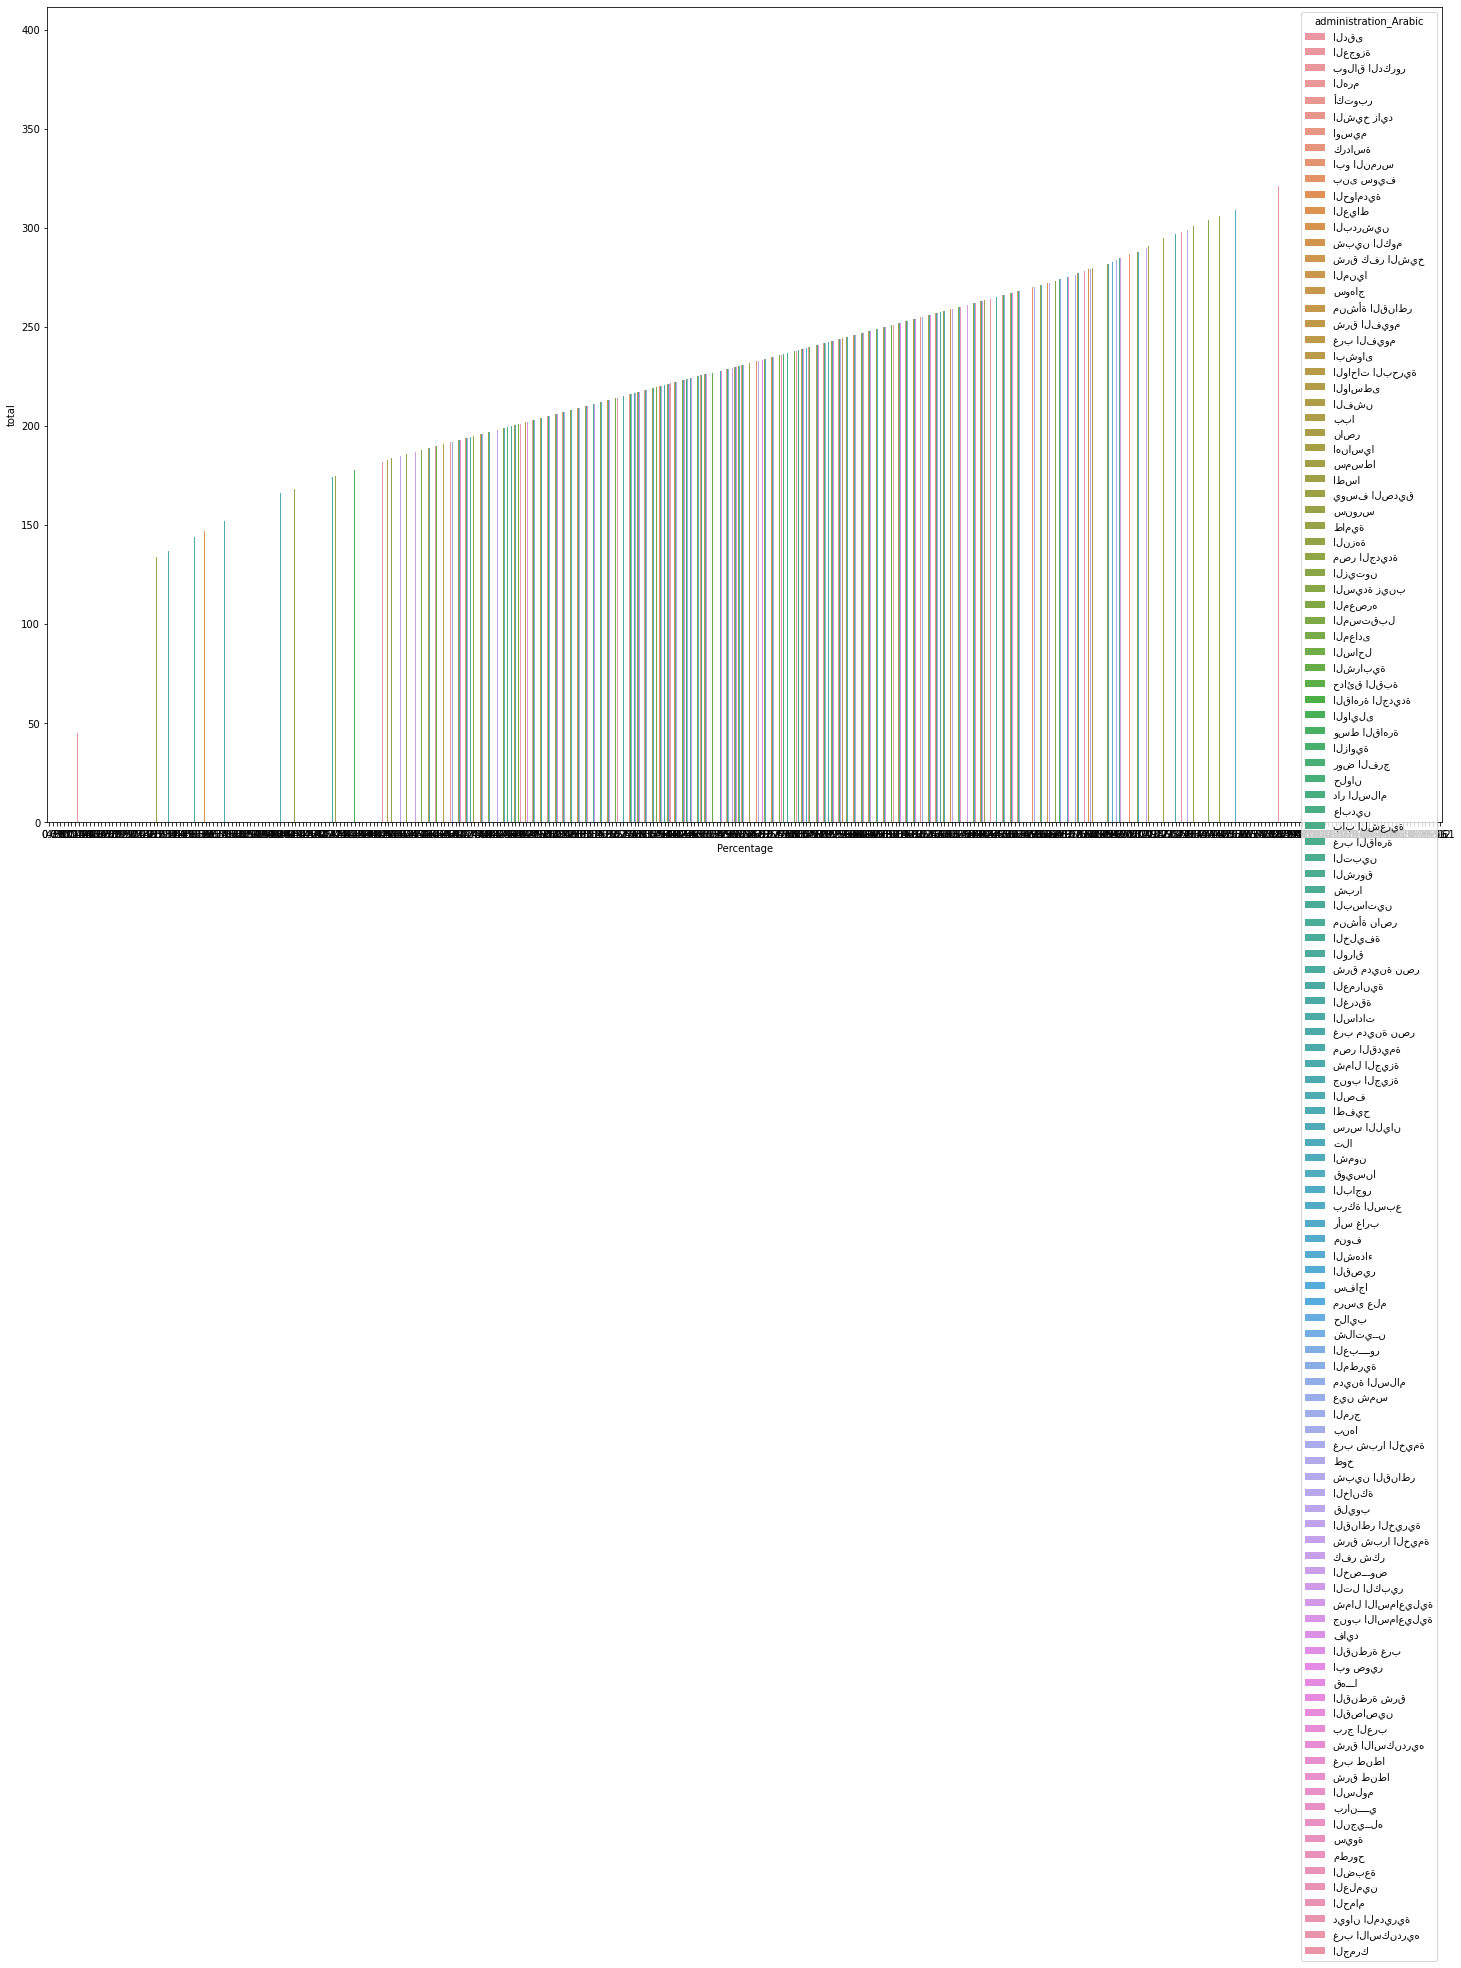

In [ ]:
#3
plt.figure(figsize=(25,15))
sns.barplot('Percentage','total','administration_Arabic', literary) 

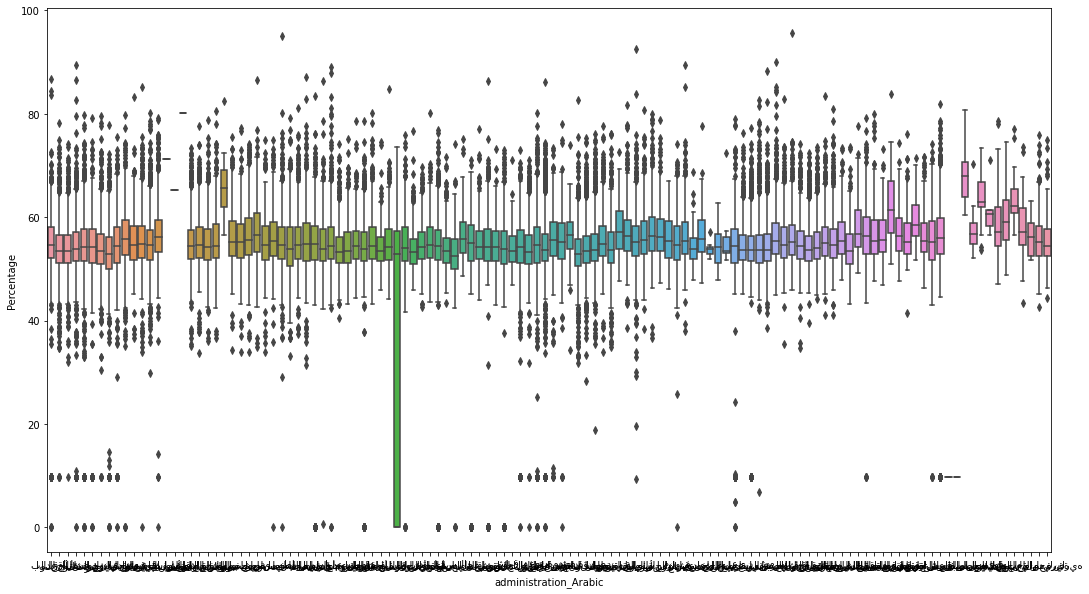

In [ ]:
plt.figure(figsize=(18,10))
sns.boxplot(x='administration_Arabic',y='Percentage',data=literary)


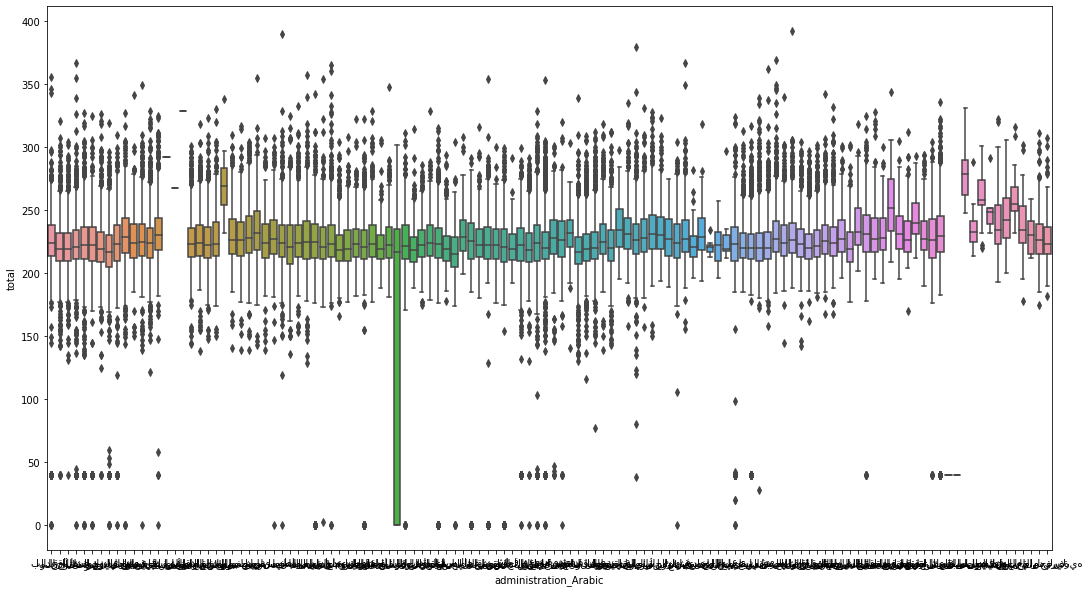

In [ ]:
plt.figure(figsize=(18,10))
sns.boxplot(x='administration_Arabic',y='total',data=literary)

Let's visualize science Result and discover which (school-government-administration) with good result.

In [12]:
science.head()

desk_no                           name  \
0  102353.0  اسماعيل احمد خلف محمد الحسيني   
1  102361.0       حسن خالد عبدالفتاح جوهري   
2  102367.0       سامي احمد سامي محمد بدوي   
3  102390.0          تايا نادر رؤوف الهامي   
4  102405.0           فريده ناير علوي فؤاد   

                     schoolName_Arabic administration_Arabic  \
0  الالمانية الانجيلية خ بنين (ابيتور)                 الدقى   
1  الالمانية الانجيلية خ بنين (ابيتور)                 الدقى   
2  الالمانية الانجيلية خ بنين (ابيتور)                 الدقى   
3  الالمانية الانجيلية خ بنات (ابيتور)                 الدقى   
4  الالمانية الانجيلية خ بنات (ابيتور)                 الدقى   

  government_Arabic  Percentage     student_type      status  arabic  \
0            الجيزة        9.76  Other qualities  successful      40   
1            الجيزة        9.76  Other qualities  successful      40   
2            الجيزة        0.00  Other qualities        fail  absent   
3            الجيزة        9.76  Other qualities  successful      40   
4            الجيزة        9.76  Other qualities  successful      40   

  first_foreign_lang second_foreign_lang    chemistry      biology  \
0        unscheduled         unscheduled  unscheduled  unscheduled   
1        unscheduled         unscheduled  unscheduled  unscheduled   
2        unscheduled         unscheduled  unscheduled  unscheduled   
3        unscheduled         unscheduled  unscheduled  unscheduled   
4        unscheduled         unscheduled  unscheduled  unscheduled   

       geology      physics  total gender  
0  unscheduled  unscheduled   40.0      M  
1  unscheduled  unscheduled   40.0      M  
2  unscheduled  unscheduled    0.0      M  
3  unscheduled  unscheduled   40.0      F  
4  unscheduled  unscheduled   40.0      F

In [ ]:
science.isnull().sum()

desk_no                  0
name                     0
schoolName_Arabic        0
administration_Arabic    0
government_Arabic        0
Percentage               0
student_type             0
status                   0
arabic                   0
first_foreign_lang       0
second_foreign_lang      0
chemistry                0
biology                  0
geology                  1
physics                  1
total                    1
gender                   1
dtype: int64

In [ ]:
science.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
82207    False
82208    False
82209    False
82210    False
82211    False
Length: 82212, dtype: bool

In [ ]:
science[["status"]].value_counts()

status    
successful    72437
fail           9775
dtype: int64

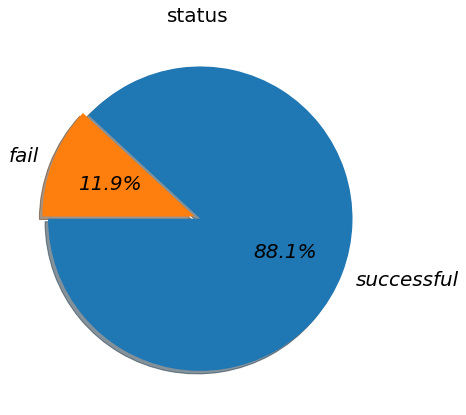

In [ ]:
pie=science[["status"]].value_counts()
plt.figure(figsize=(7,7))

plt.pie(pie, labels=["successful", "fail"],
        explode=[0.02,0.02],
        startangle=180,
        autopct='%1.1f%%',shadow=True, 
        textprops={"fontsize":20, "style":"italic"})

plt.title('status', fontsize=20)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


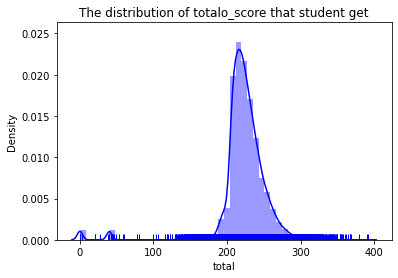

In [ ]:
ax= sns.distplot(science['total'], rug=True, color="blue")
plt.title("The distribution of totalo_score that student get")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


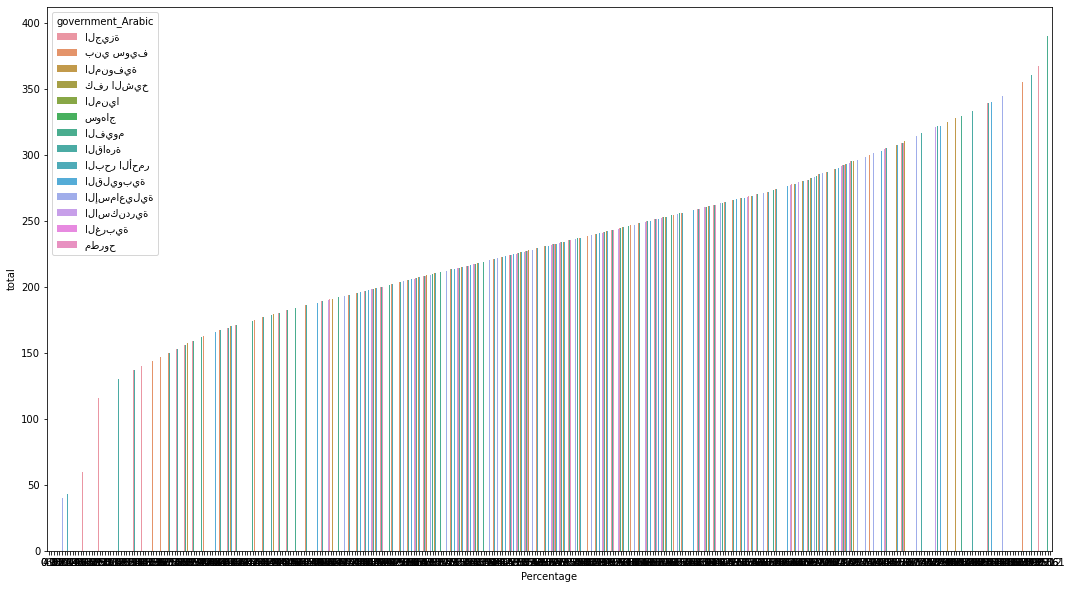

In [ ]:
#1
plt.figure(figsize=(18,10))
sns.barplot('Percentage','total','government_Arabic', science) 

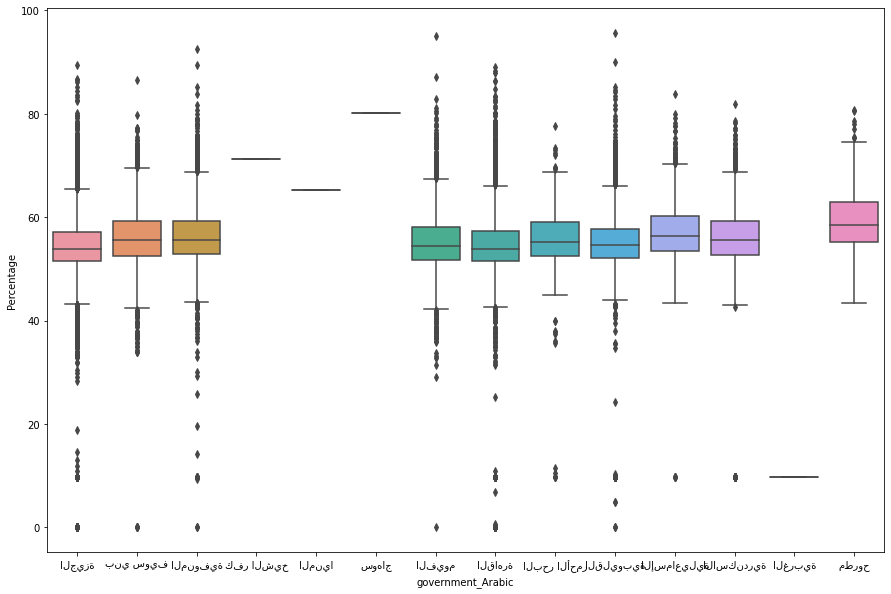

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x='government_Arabic',y='Percentage',data=science)

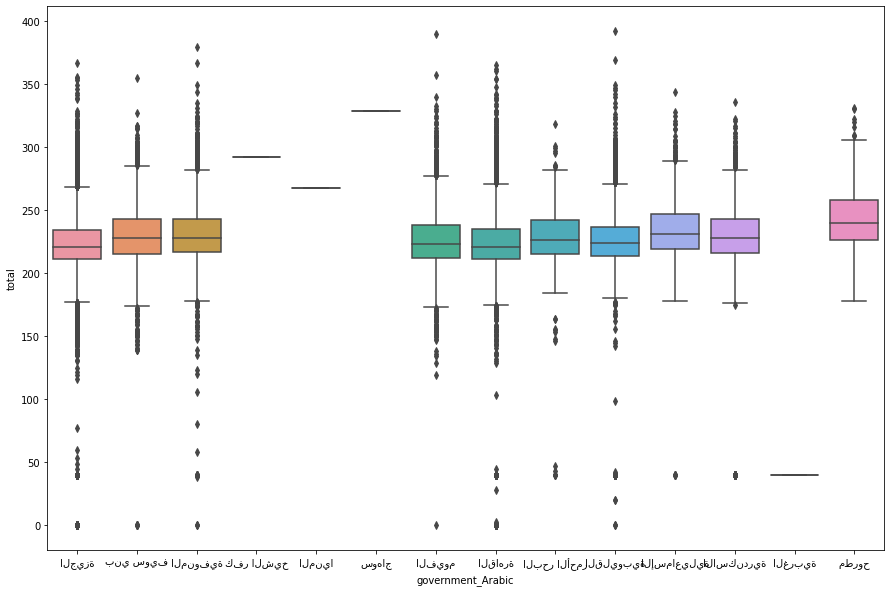

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x='government_Arabic',y='total',data=science)

In [ ]:
#2
plt.figure(figsize=(15,10))
sns.barplot('Percentage','total','schoolName_Arabic', science) 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x='schoolName_Arabic',y='Percentage',data=science)

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x='schoolName_Arabic',y='total',data=science)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


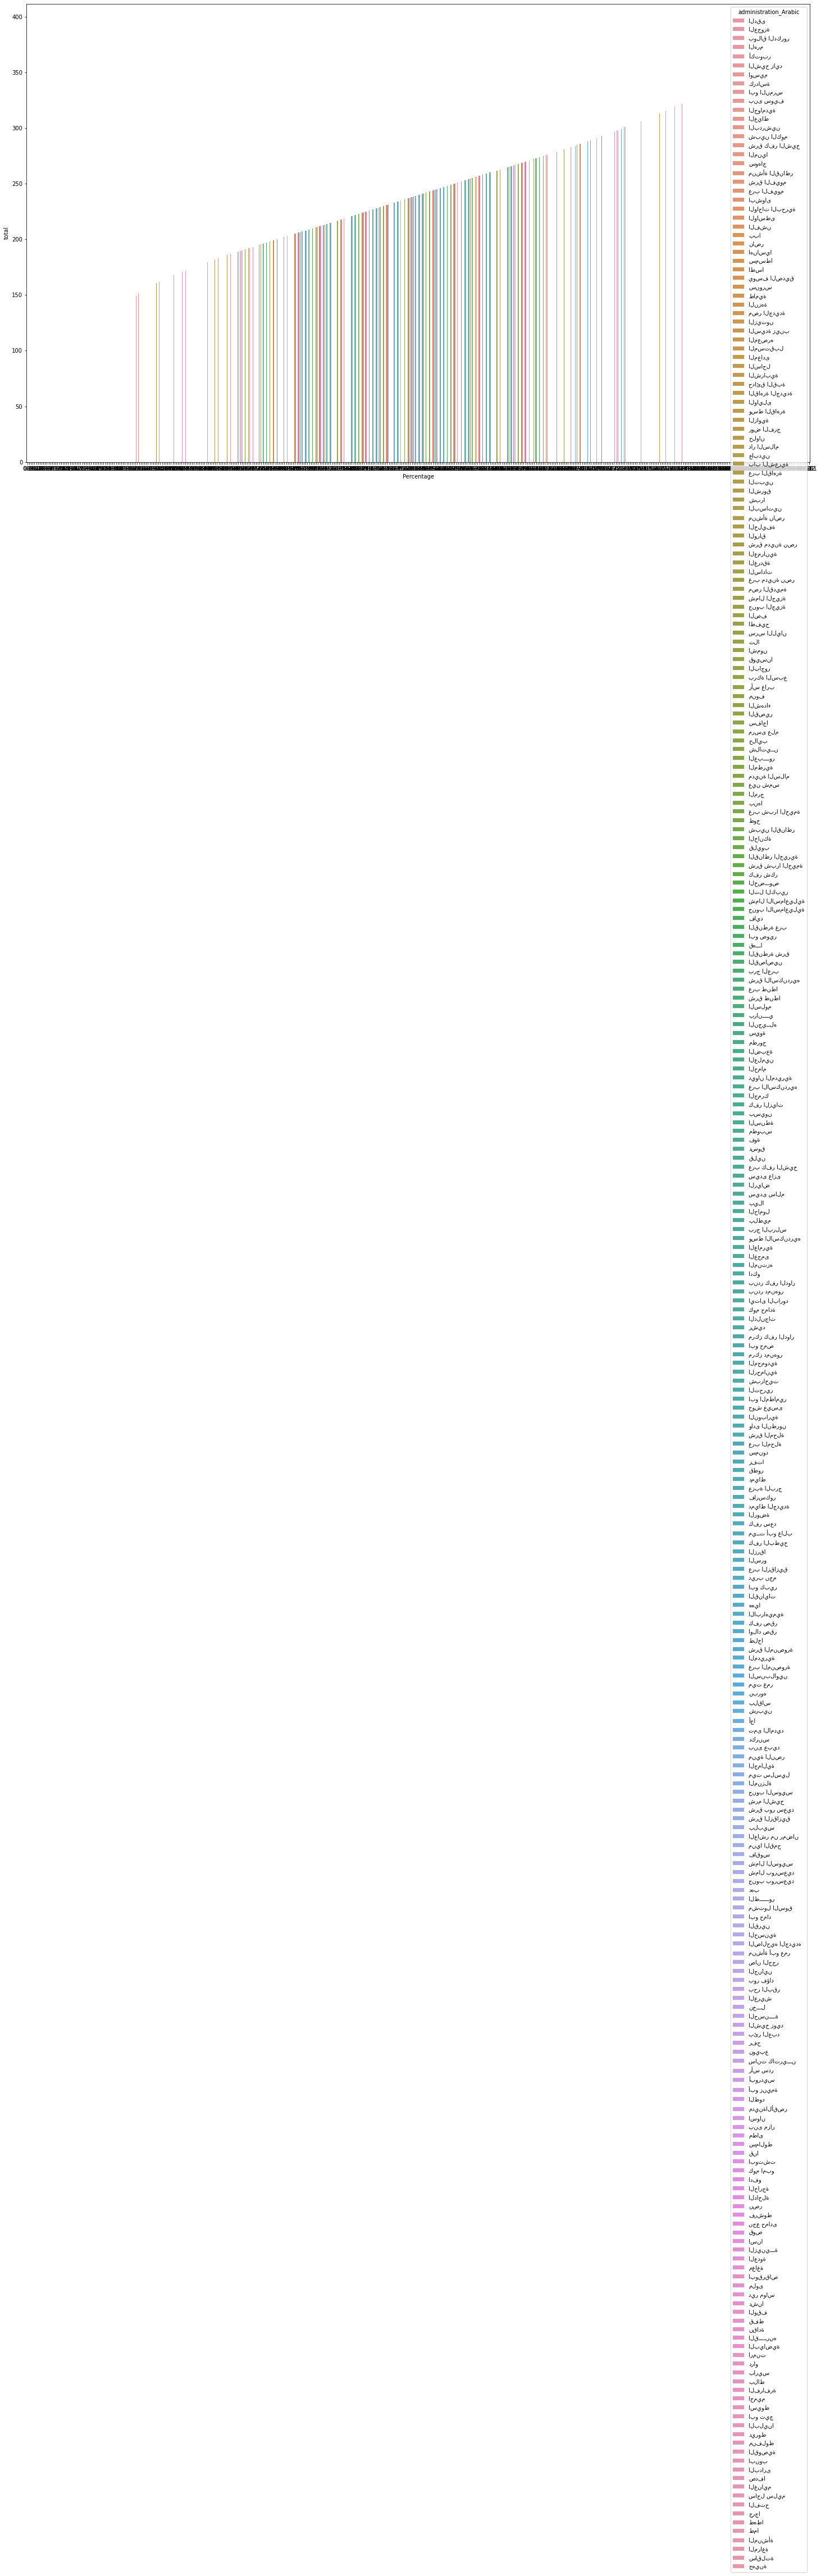

In [25]:
#3
plt.figure(figsize=(25,15))
sns.barplot('Percentage','total','administration_Arabic', science) 

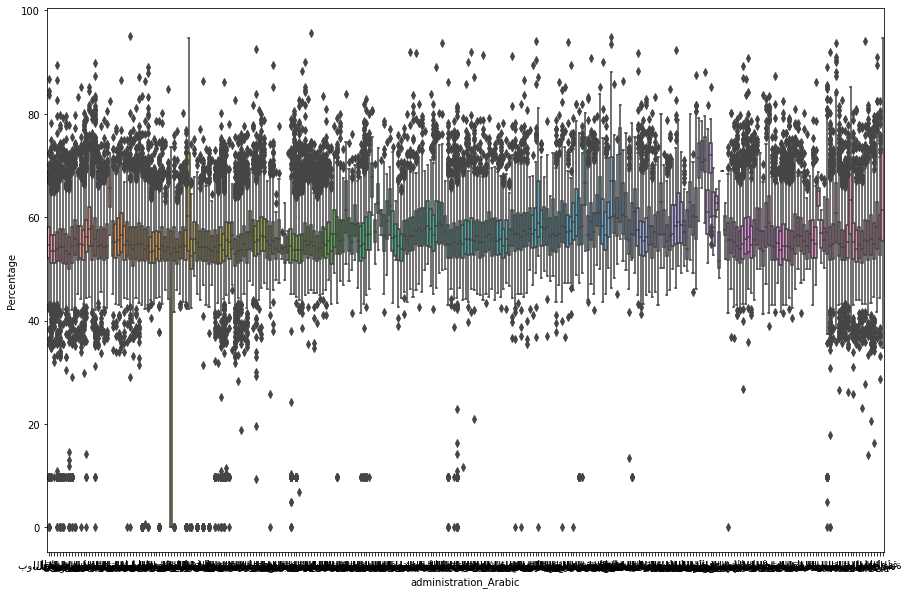

In [24]:
plt.figure(figsize=(15,10))
sns.boxplot(x='administration_Arabic',y='Percentage',data=science)


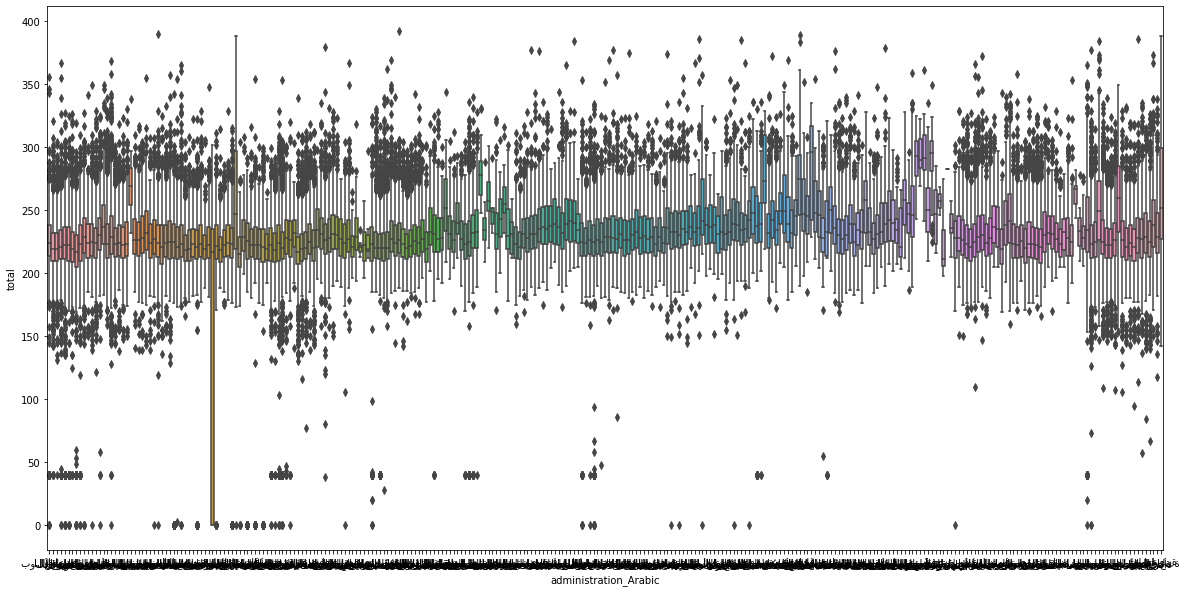

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x='administration_Arabic',y='total',data=science)


Let's visualize Mathematics Result and discover which (school-government-administration) with good result.

In [13]:
mathematics.head()

desk_no                           name  \
0  102353.0  اسماعيل احمد خلف محمد الحسيني   
1  102361.0       حسن خالد عبدالفتاح جوهري   
2  102367.0       سامي احمد سامي محمد بدوي   
3  102390.0          تايا نادر رؤوف الهامي   
4  102405.0           فريده ناير علوي فؤاد   

                     schoolName_Arabic administration_Arabic  \
0  الالمانية الانجيلية خ بنين (ابيتور)                 الدقى   
1  الالمانية الانجيلية خ بنين (ابيتور)                 الدقى   
2  الالمانية الانجيلية خ بنين (ابيتور)                 الدقى   
3  الالمانية الانجيلية خ بنات (ابيتور)                 الدقى   
4  الالمانية الانجيلية خ بنات (ابيتور)                 الدقى   

  government_Arabic  Percentage     student_type      status  arabic  \
0            الجيزة        9.76  Other qualities  successful      40   
1            الجيزة        9.76  Other qualities  successful      40   
2            الجيزة        0.00  Other qualities        fail  absent   
3            الجيزة        9.76  Other qualities  successful      40   
4            الجيزة        9.76  Other qualities  successful      40   

  first_foreign_lang second_foreign_lang      physics    chemistry  \
0        unscheduled         unscheduled  unscheduled  unscheduled   
1        unscheduled         unscheduled  unscheduled  unscheduled   
2        unscheduled         unscheduled  unscheduled  unscheduled   
3        unscheduled         unscheduled  unscheduled  unscheduled   
4        unscheduled         unscheduled  unscheduled  unscheduled   

  applied_math pure_mathematics  total gender  
0  unscheduled      unscheduled   40.0      M  
1  unscheduled      unscheduled   40.0      M  
2  unscheduled      unscheduled    0.0      M  
3  unscheduled      unscheduled   40.0      F  
4  unscheduled      unscheduled   40.0      F

In [ ]:
mathematics.isnull().sum()

desk_no                  1
name                     1
schoolName_Arabic        1
administration_Arabic    1
government_Arabic        1
Percentage               1
student_type             1
status                   1
arabic                   1
first_foreign_lang       1
second_foreign_lang      1
physics                  1
chemistry                1
applied_math             1
pure_mathematics         1
total                    1
gender                   0
dtype: int64

In [ ]:
mathematics.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
155525    False
155526    False
155527    False
155528    False
155529    False
Length: 155530, dtype: bool

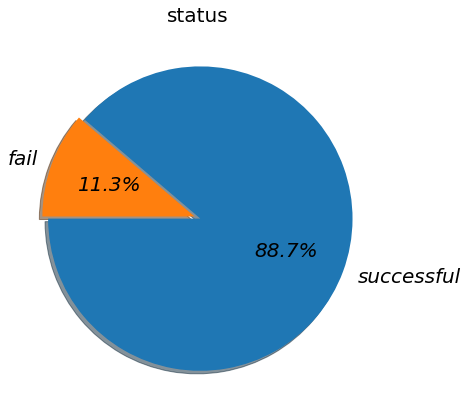

In [ ]:
pie=mathematics[["status"]].value_counts()
plt.figure(figsize=(7,7))

plt.pie(pie, labels=["successful", "fail"],
        explode=[0.02,0.02],
        startangle=180,
        autopct='%1.1f%%',shadow=True, 
        textprops={"fontsize":20, "style":"italic"})

plt.title('status', fontsize=20)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


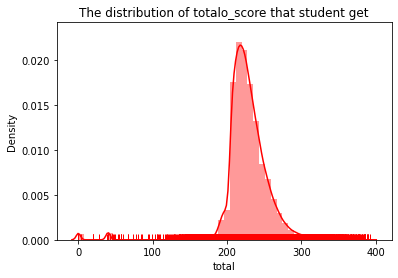

In [ ]:
ax= sns.distplot(mathematics['total'], rug=True, color="red")
plt.title("The distribution of totalo_score that student get")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


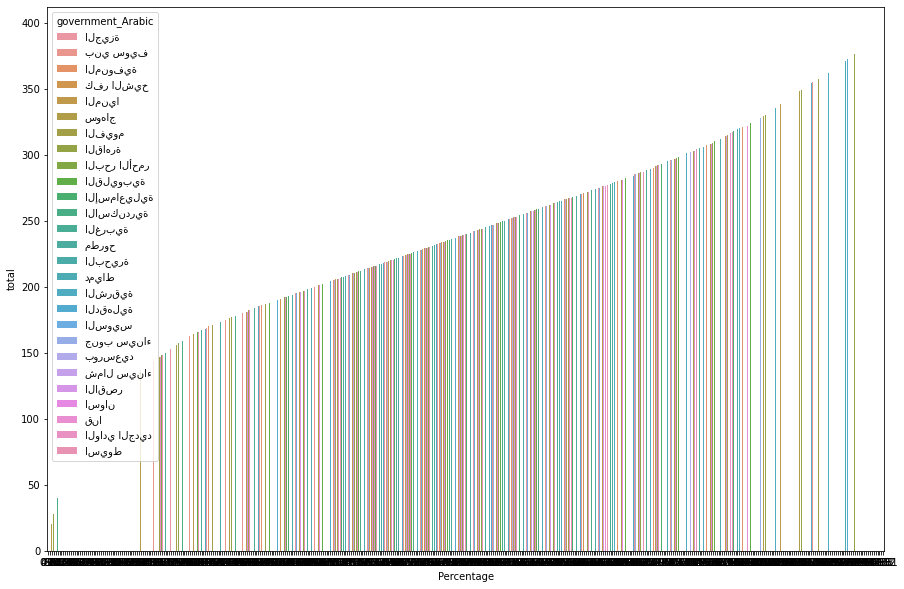

In [22]:
#1
plt.figure(figsize=(15,10))
sns.barplot('Percentage','total','government_Arabic', mathematics) 

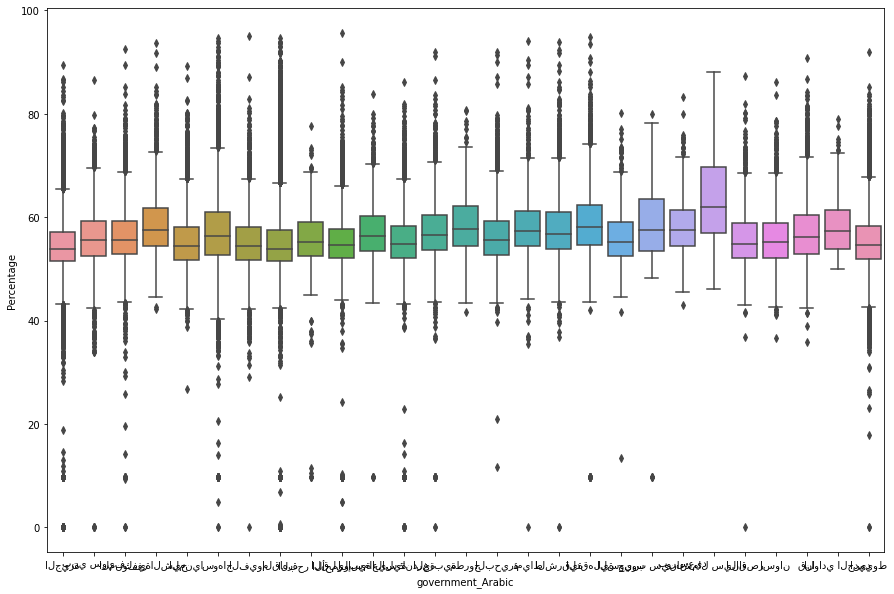

In [14]:
plt.figure(figsize=(15,10))
sns.boxplot(x='government_Arabic',y='Percentage',data=mathematics)

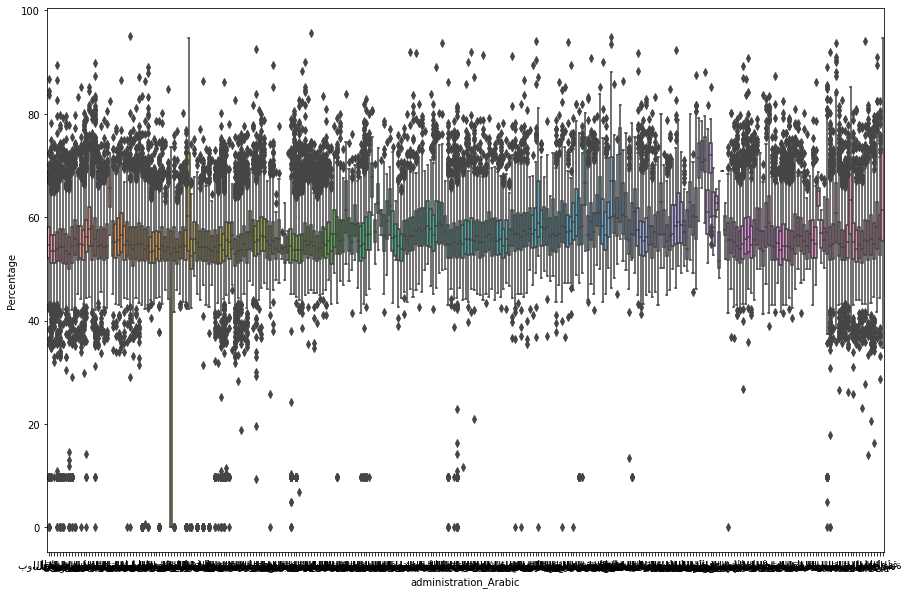

In [15]:
plt.figure(figsize=(15,10))
sns.boxplot(x='administration_Arabic',y='Percentage',data=mathematics)

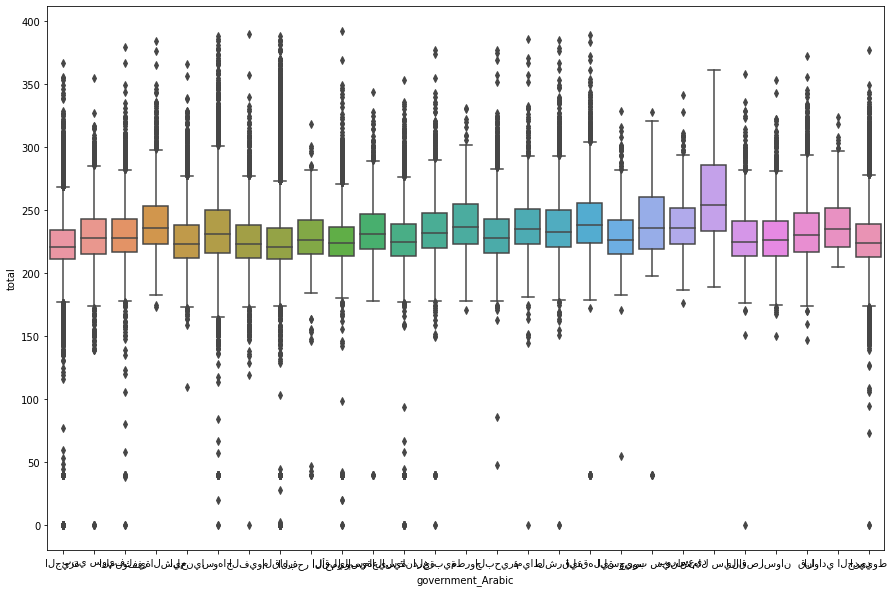

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x='government_Arabic',y='total',data=mathematics)

In [23]:
#2
plt.figure(figsize=(25,15))
sns.barplot('Percentage','total','schoolName_Arabic', mathematics) 

In [20]:
plt.figure(figsize=(15,10))
sns.boxplot(x='schoolName_Arabic',y='Percentage',data=mathematics)

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x='schoolName_Arabic',y='total',data=mathematics)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


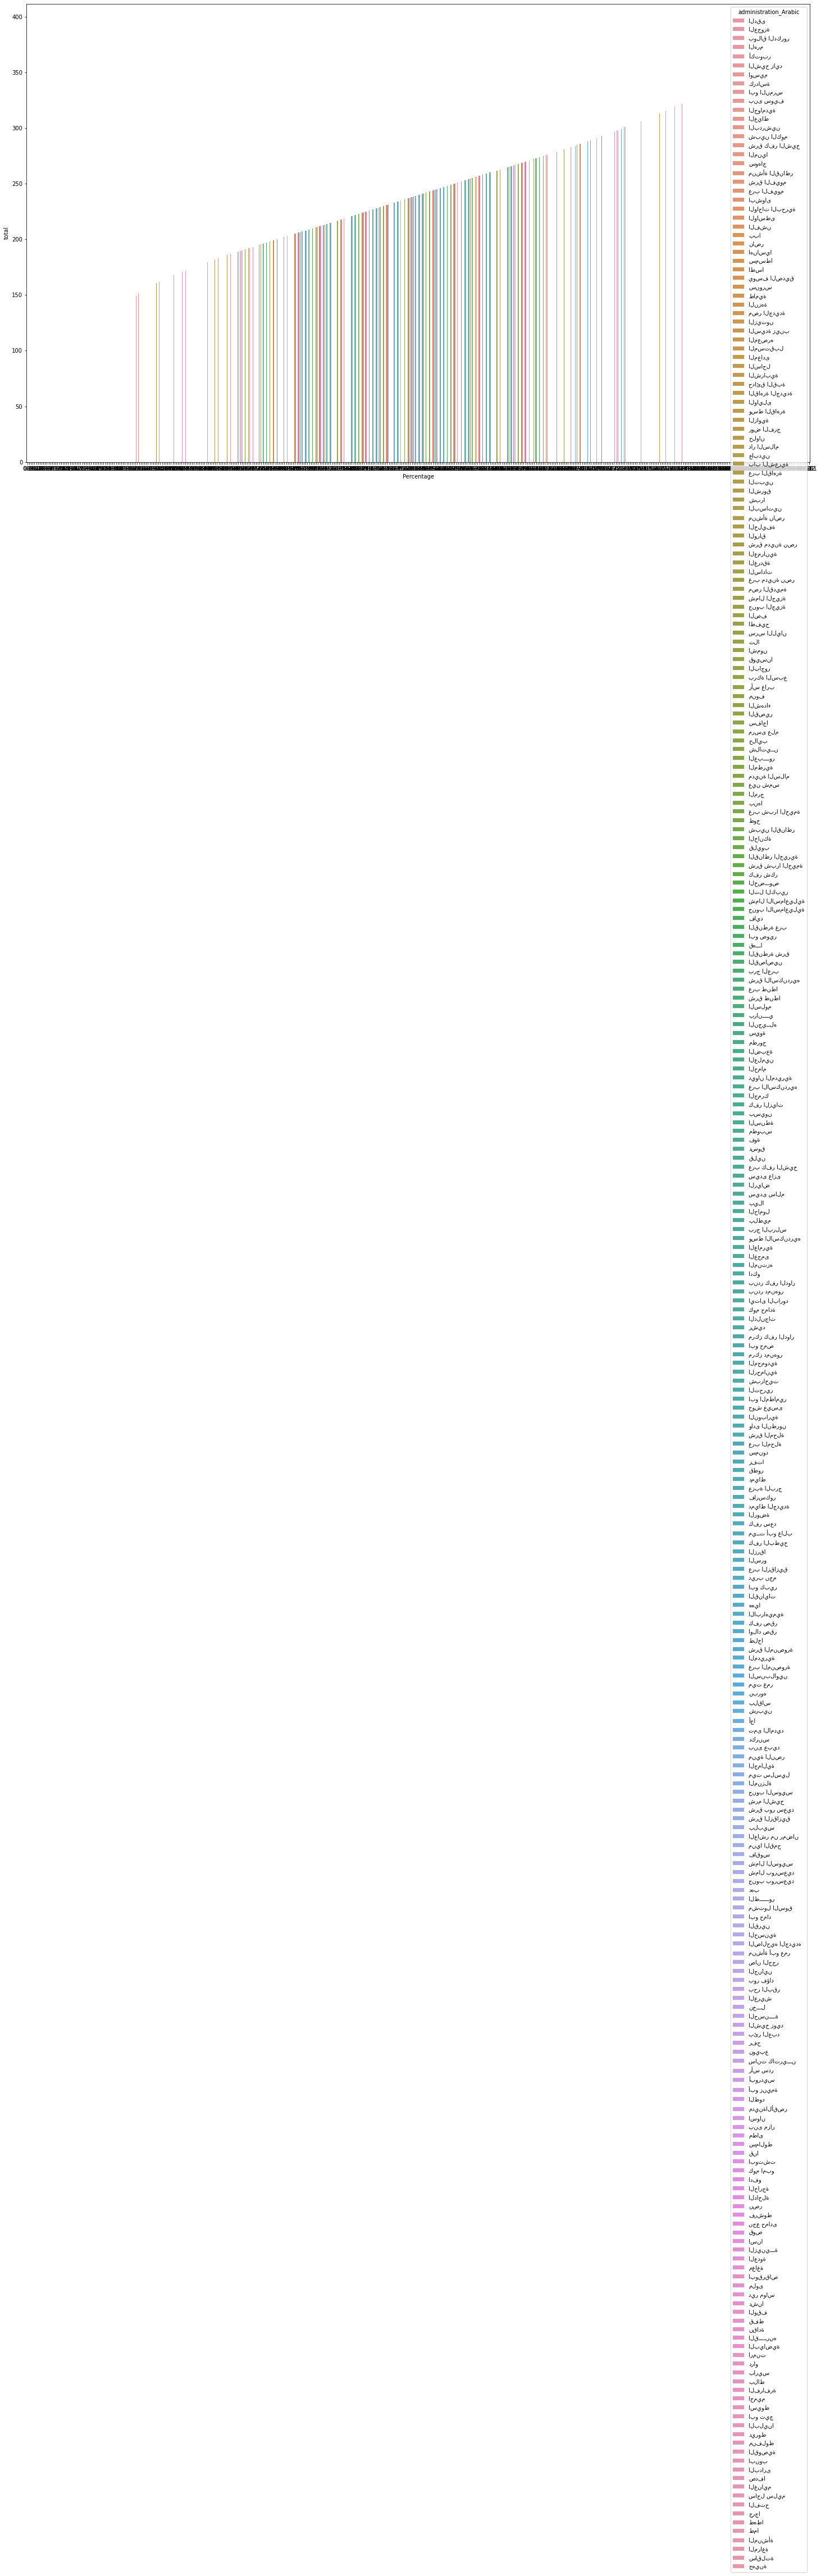

In [21]:
#3
plt.figure(figsize=(25,15))
sns.barplot('Percentage','total','administration_Arabic', mathematics) 


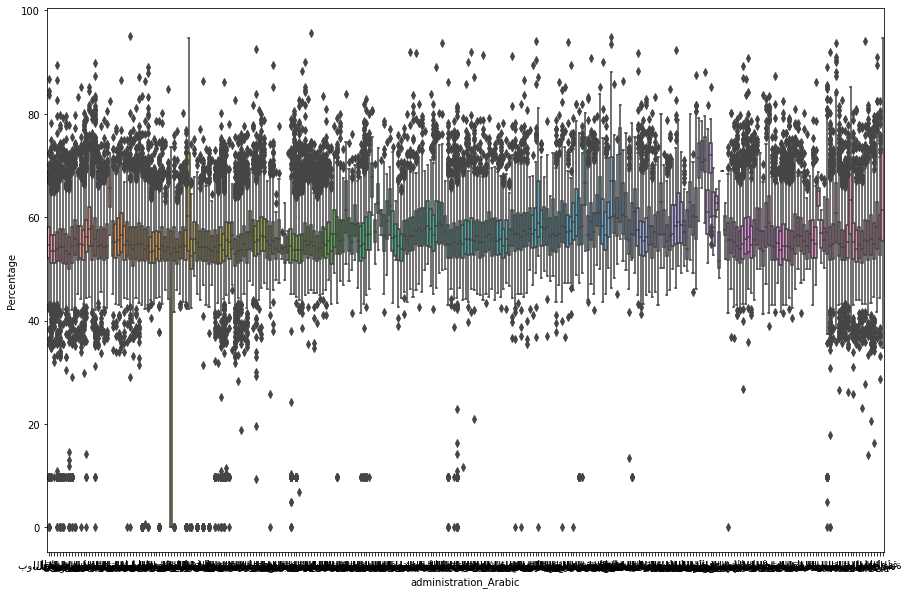

In [17]:
plt.figure(figsize=(15,10))
sns.boxplot(x='administration_Arabic',y='Percentage',data=mathematics)

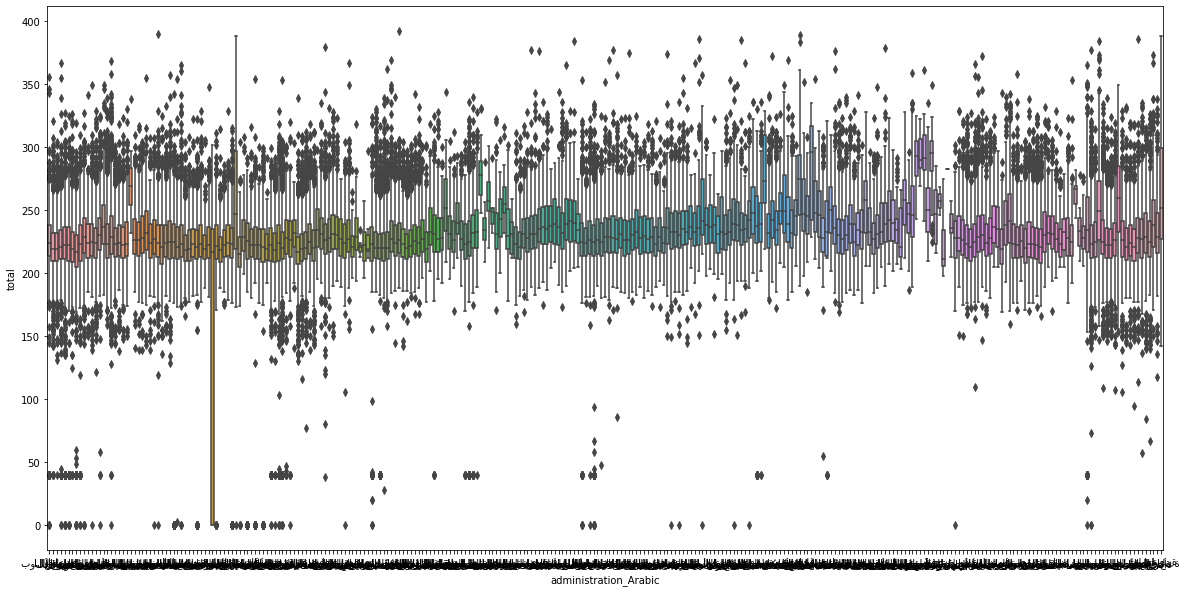

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x='administration_Arabic',y='total',data=mathematics)

DO correlatio 

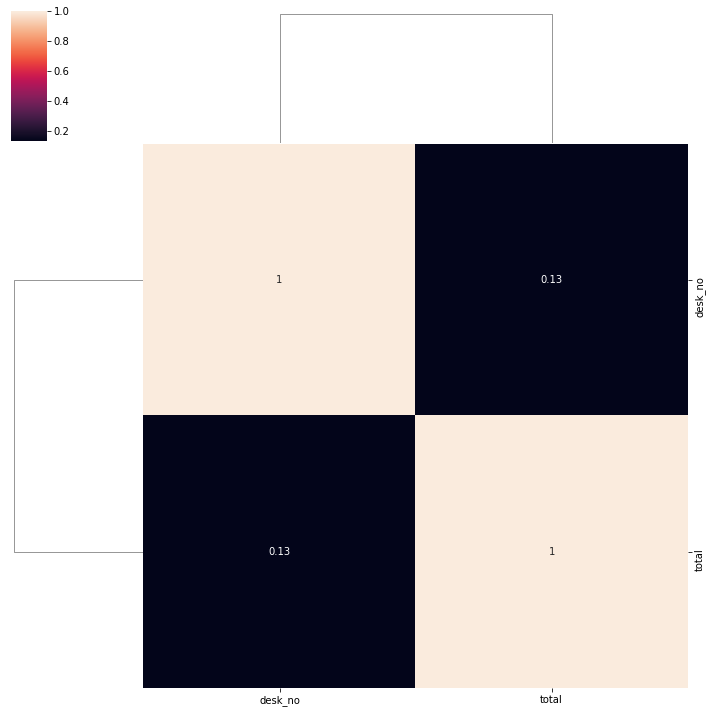

In [ ]:
sns.clustermap(data.corr(),annot=True)

Do pairplot

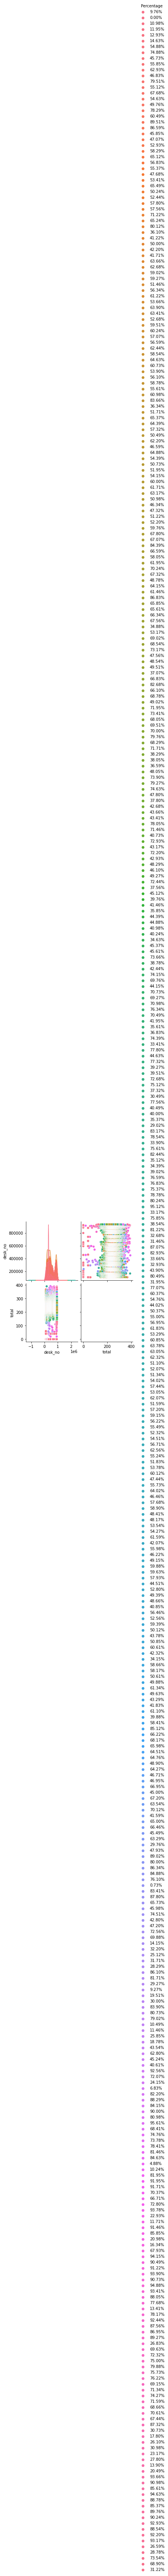

In [ ]:
sns.pairplot(data,hue='Percentage')